In [1]:
#data processing 
import pandas as pd
import numpy as np
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#reading in data
df = pd.read_csv("C:/Users/17326/OneDrive - go.Stockton.edu/Documents/dssa/fetal_health.csv")

In [3]:
#overview of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
#summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<AxesSubplot: xlabel='fetal_health', ylabel='count'>

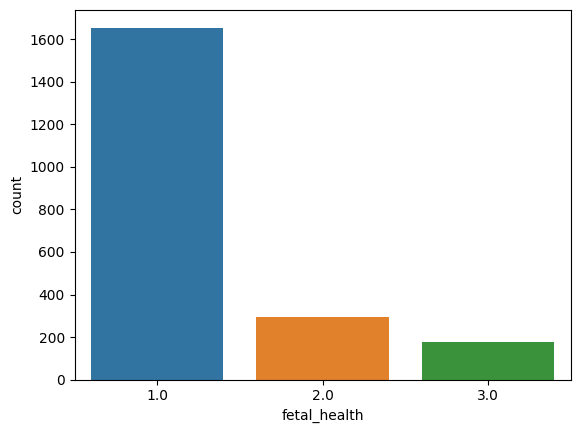

In [5]:
#looking to see if target value (fetal health) is imbalanced
sns.countplot(data = df, x = "fetal_health")

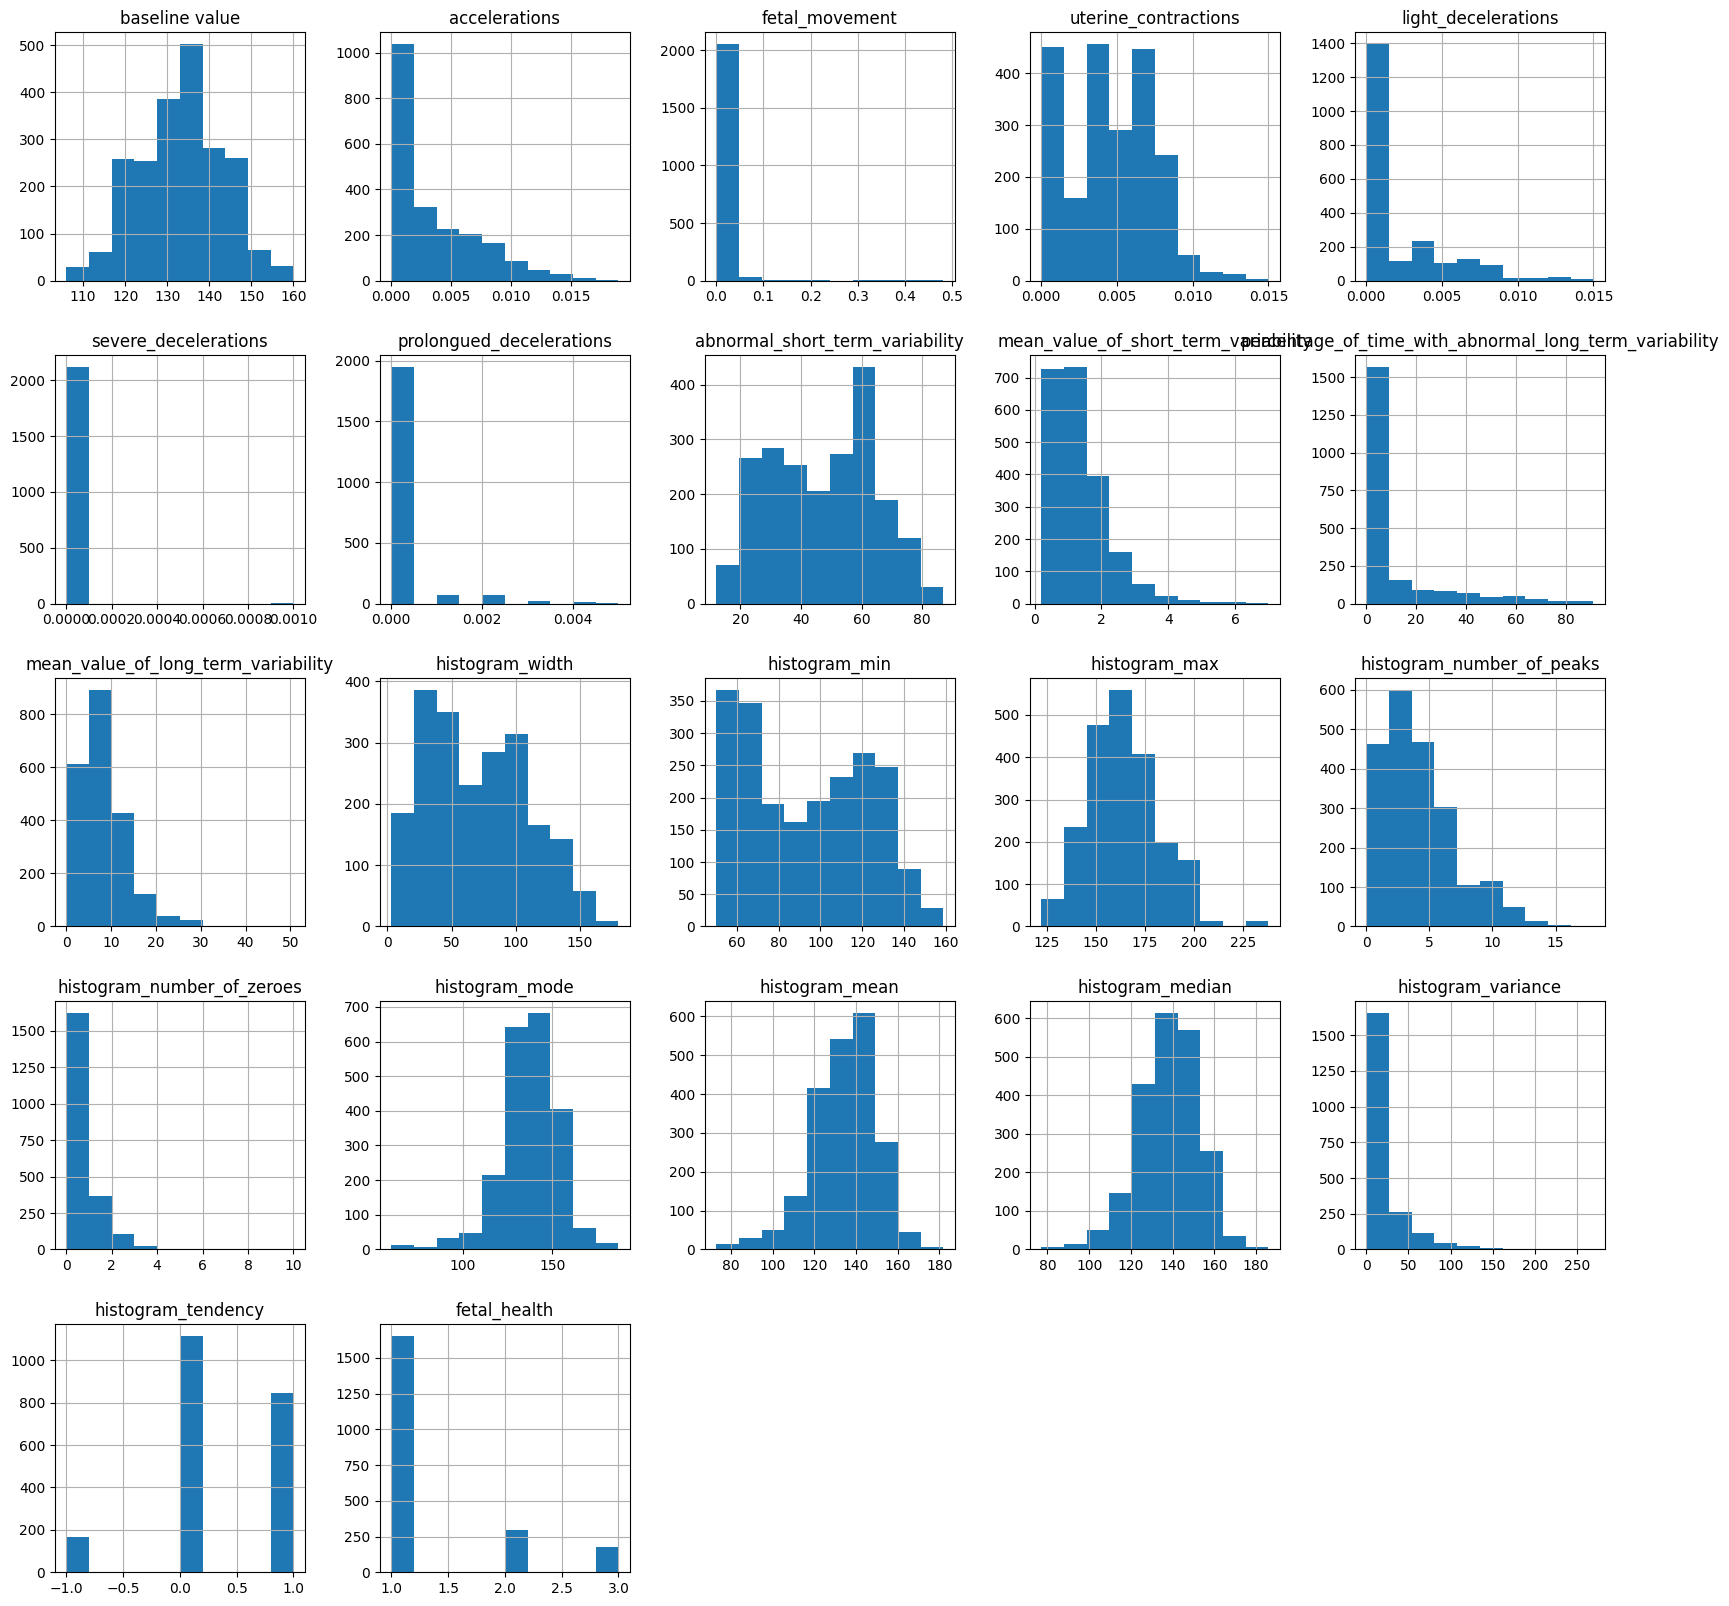

In [6]:
#looking to see how all features are distributed 
hist_plot = df.hist(figsize= (20,20))

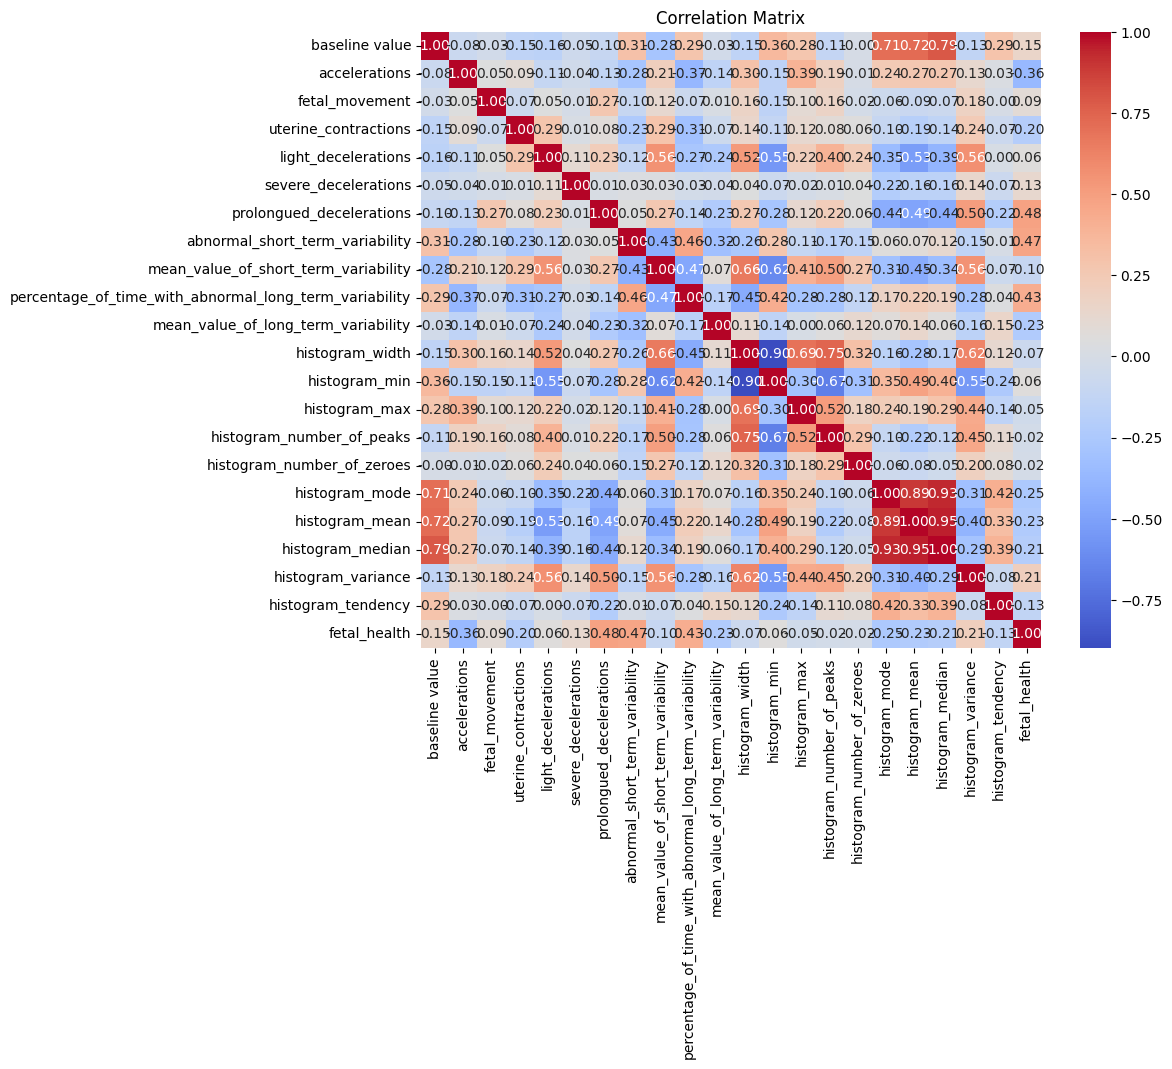

In [7]:
#correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()

In [8]:
#defining features and target variable
X = df.drop(["fetal_health"], axis= 1)
y = df["fetal_health"]

In [9]:
#Stanadrdizing the data
col_names = list(X.columns)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = col_names)

In [10]:
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


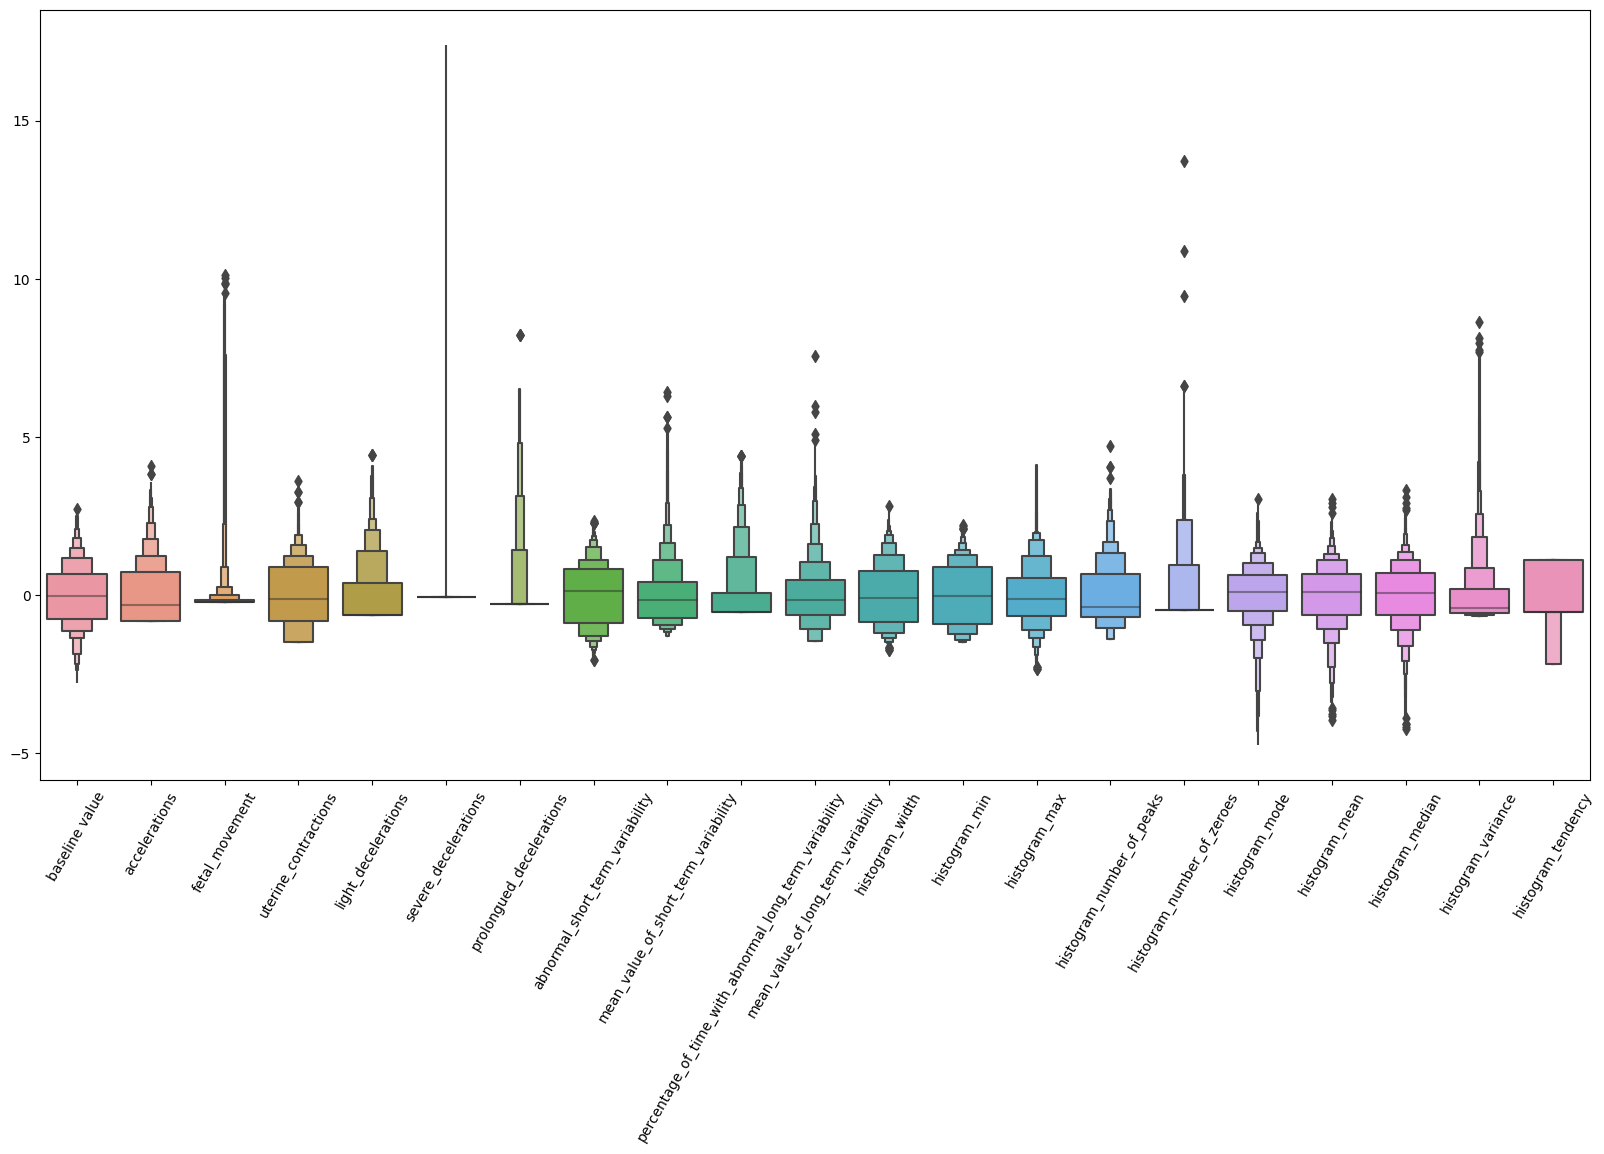

In [11]:
#plotting standardized features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_Scaled)
plt.xticks(rotation=60)
plt.show()

In [12]:
#splitting into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size =0.2, random_state=42) #80/20 training test split

In [13]:
#creating a logistic regression model & fitting the training data
logreg_model = LogisticRegression(max_iter=1000, multi_class= 'multinomial')
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [14]:
#making predictions on the test set
y_pred = logreg_model.predict(X_test)

In [15]:
#evaluate model's performance

accuracy = accuracy_score(y_test, y_pred)
classificiation = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print results
print("Accuracy: ", accuracy)
print("Classification Report:\n", classificiation)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  0.8779342723004695
Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.63      0.64      0.64        64
         3.0       0.73      0.76      0.75        29

    accuracy                           0.88       426
   macro avg       0.77      0.78      0.77       426
weighted avg       0.88      0.88      0.88       426

Confusion Matrix:
 [[311  19   3]
 [ 18  41   5]
 [  2   5  22]]


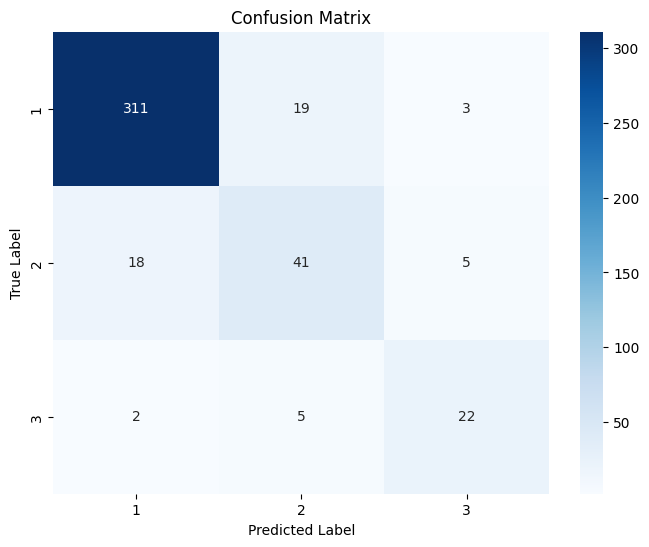

In [16]:
#visual of log reg confusion matrix

plt.figure(figsize=(8,6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()